In [172]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/permutations/results.csv
#read in data
snps = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/permutations/results.csv')
#washing phenotype /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/washing_phenotypes.csv
wash_pheno = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/washing_phenotypes.csv')
#import rna seq corrs /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Analysis of Clement-Ziza RNA-seq/wash_corr.csv
wash_corr = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Analysis of Clement-Ziza RNA-seq/wash_corr.csv')
#full snp dataset /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/SupplementaryDataset_S7_genotype.tsv
full_snps = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/SupplementaryDataset_S7_genotype.tsv', sep='\t',header=15)
#load orthologs database /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/final_orthology_database.csv
orthologs = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/final_orthology_database.csv')


In [173]:
full_snps

,chromosome,position,968_allele,Y0036_allele,968,Y0036,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_10,R1_11,R1_12,R1_13,R1_16,R1_15,R1_17,R1_18,R1_19,R1_20,R1_21,R1_22,R1_23,R1_24,R1_14,R1_25,R1_26,R1_27,R1_28,R1_29,R1_30,R1_31,R1_32,R1_33,R1_35,R1_36,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
0,chromosome_1,54120,A,G,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,chromosome_1,60438,C,T,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,chromosome_1,71120,A,G,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,chromosome_1,74490,CTT,C,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,chromosome_1,78435,G,A,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,chromosome_3,2422376,G,A,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4477,chromosome_3,2423131,C,T,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4478,chromosome_3,2426173,A,T,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4479,chromosome_3,2427197,G,A,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [169]:
#remove first 4 columns
full_snps = full_snps.iloc[:,4:]
#rename column 968 to X968
full_snps.rename(columns={'968':'X968'}, inplace=True)
#re order wash_pheno such that order of strains matches columns in full_snps column names
pca_pheno = pd.DataFrame(columns = ['strain','ratio'])
for i in full_snps.columns:
    #see what is the column name, and find the row in wash_pheno where strain has the same name
    
    row = wash_pheno.loc[wash_pheno['strain'] == i]
    pca_pheno = pca_pheno.append(row)
#pcapheno remove column Unnamed: 0
pca_pheno.drop(columns=['Unnamed: 0'], inplace=True)
#reset index
pca_pheno.reset_index(inplace=True)
#remove chromosome_ from chromosome column
snps['chromosome'] = snps['chromosome'].str.replace('chromosome_', '')
#change chromosome number to roman numbers
snps['chromosome'] = snps['chromosome'].str.replace('1','I')
snps['chromosome'] = snps['chromosome'].str.replace('2','II')
snps['chromosome'] = snps['chromosome'].str.replace('3','III')


In [ ]:
snps.loc[snps["position"]==2528629]

,Unnamed: 0,chromosome,position,X968_allele,Y0036_allele,X968,Y0036,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_10,R1_11,R1_12,R1_13,R1_16,R1_15,R1_17,R1_18,R1_19,R1_20,R1_21,R1_22,R1_23,R1_24,R1_14,R1_25,R1_26,R1_27,R1_28,R1_29,R1_30,R1_31,R1_32,R1_33,R1_35,R1_36,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
9,2257,II,2528629,T,A,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,NaN,0,0.0,0.0,0,0,1.0,0,0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,1,0.0,0,0,0,0,0,0


In [ ]:
snps.loc[snps["position"]==2527314]

,Unnamed: 0,chromosome,position,X968_allele,Y0036_allele,X968,Y0036,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_10,R1_11,R1_12,R1_13,R1_16,R1_15,R1_17,R1_18,R1_19,R1_20,R1_21,R1_22,R1_23,R1_24,R1_14,R1_25,R1_26,R1_27,R1_28,R1_29,R1_30,R1_31,R1_32,R1_33,R1_35,R1_36,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
7,2255,II,2527314,G,A,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,NaN,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,1,0.0,0,0,0,0,0,0


In [ ]:
snps.loc[snps["position"]==2524266]

,Unnamed: 0,chromosome,position,X968_allele,Y0036_allele,X968,Y0036,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_10,R1_11,R1_12,R1_13,R1_16,R1_15,R1_17,R1_18,R1_19,R1_20,R1_21,R1_22,R1_23,R1_24,R1_14,R1_25,R1_26,R1_27,R1_28,R1_29,R1_30,R1_31,R1_32,R1_33,R1_35,R1_36,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
6,2254,II,2524266,C,T,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,0.0,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0.0,0,0,0,0,0,0


In [ ]:
snps

,Unnamed: 0,chromosome,position,X968_allele,Y0036_allele,X968,Y0036,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_10,R1_11,R1_12,R1_13,R1_16,R1_15,R1_17,R1_18,R1_19,R1_20,R1_21,R1_22,R1_23,R1_24,R1_14,R1_25,R1_26,R1_27,R1_28,R1_29,R1_30,R1_31,R1_32,R1_33,R1_35,R1_36,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
0,2179,II,2334988,CT,C,0,1,NaN,0,0,1,1,0,1,0,1,0,1,0,0.0,0,NaN,NaN,0,0,NaN,0,0,1.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,NaN,0,0,0,0,0,0
1,2180,II,2358836,A,AT,0,1,NaN,0,0,1,1,0,1,0,1,0,1,0,0.0,0,NaN,NaN,0,0,NaN,0,0,1.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,NaN,0,0,0,0,0,0
2,2181,II,2359346,G,GT,0,1,NaN,0,0,1,1,0,1,0,1,0,1,0,0.0,0,NaN,NaN,0,0,NaN,0,0,1.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,NaN,0,0,0,0,0,0
3,2182,II,2363654,A,T,0,1,NaN,0,0,1,1,0,1,0,1,0,1,0,0.0,0,NaN,NaN,0,0,NaN,0,0,1.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,NaN,0,0,0,0,0,0
4,2252,II,2516209,T,C,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,0.0,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0.0,0,0,0,0,0,0
5,2253,II,2519198,A,T,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,0.0,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0.0,0,0,0,0,0,0
6,2254,II,2524266,C,T,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,0.0,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0.0,0,0,0,0,0,0
7,2255,II,2527314,G,A,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,NaN,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,1,0.0,0,0,0,0,0,0
8,2256,II,2527344,A,G,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,NaN,0,0.0,0.0,0,0,1.0,0,0,NaN,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,1,0.0,0,0,0,0,0,0
9,2257,II,2528629,T,A,0,1,1.0,0,0,1,1,0,1,0,1,0,1,0,NaN,0,0.0,0.0,0,0,1.0,0,0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,1,0.0,0,0,0,0,0,0


In [ ]:
snps_t = snps.transpose()
#remove first 5 rows
snps_t = snps_t.iloc[5:]
#by matching index of snps_t to column strain in wash_pheno, we can add the phenotype to the snps_t dataframe
snps_t['phenotype'] = wash_pheno.set_index('strain')['ratio']
#rename first 34 columns to snps df position 
#snps_t first 34 columns rename as snps["position"]
snps_t.columns = np.append(snps["position"].values, snps_t.columns[34]).flatten()

In [ ]:
#for each column perform a t-test between phenotypes of rows with 0 and 1
#store p-values in a list
import scipy.stats as st

p_values = []
#iterate through columns
for i in range(0, len(snps_t.columns)-1):
    #get column
    col = snps_t.iloc[:,i]
    #get phenotype column
    pheno = snps_t.iloc[:,-1]
    #get rows with 0 and 1
    col_0 = col[col == 0]
    col_1 = col[col == 1]
    #get phenotype rows with 0 and 1
    pheno_0 = pheno[col == 0]
    pheno_1 = pheno[col == 1]
    #perform t-test
    t, p = st.ttest_ind(pheno_0, pheno_1)
    p_values.append(p)
#add final entry NA
p_values.append("NA")
#add row with index p_vals
snps_t.loc['p_vals'] = p_values
snps_t



,2334988,2358836,2359346,2363654,2516209,2519198,2524266,2527314,2527344,2528629,2536217,2549699,2549939,2552492,2552671,2552920,2553226,2557020,2557491,2560197,2560434,2564322,2566252,2567419,2574293,2576499,2576500,2576944,2578048,2580336,2584532,2585748,2588585,2588600,phenotype
X968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04793
Y0036,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.172119
R1_1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.054247
R1_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.061369
R1_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033055
R1_4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.019548
R1_5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.061934
R1_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.036447
R1_7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.020331
R1_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04712


[0.21499201 0.13957448]


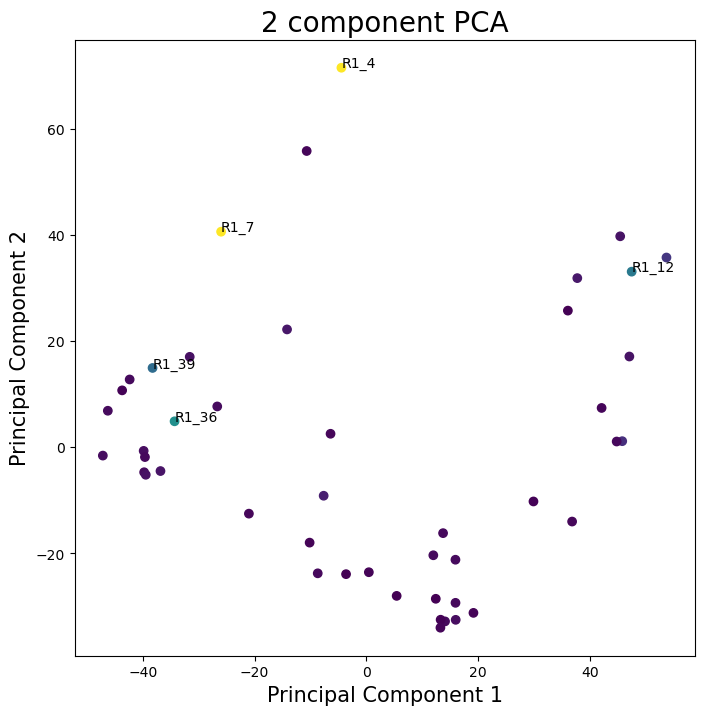

In [ ]:
#create PCA plot
#take entries except last column and last row
full_snps_pca = full_snps.T
#perform PCA and label with rownames on plot, and colour by respecitve phenotypes (stored in snps_t ["phenotype"])
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#for NaN values randomly replace them with 0 or 1
for i in range(0, len(full_snps_pca.columns)):
    full_snps_pca.iloc[:,i] = full_snps_pca.iloc[:,i].fillna(np.random.choice([0,1]))
#standardise data
X_std = StandardScaler().fit_transform(full_snps_pca)  
#perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
#add principal components to dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#add phenotype column
principalDf['phenotype'] = snps_t.iloc[:-1,-1].values
#change phenotype column to float
principalDf['phenotype'] = pca_pheno["ratio"].astype(float)

#plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#plot each point and color by viridis based on phenotype value
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['phenotype'], cmap='viridis')
#add rownames for points with phenotype above 0.2 or with names X968 and Y0036. Use snps_t_pca.index
for i in range(0, len(principalDf.index)):
    if principalDf.iloc[i,2] > 0.2 or principalDf.index[i] == 'X968' or principalDf.index[i] == 'Y0036':
        ax.annotate(pca_pheno["strain"][i], (principalDf.iloc[i,0], principalDf.iloc[i,1]))
#add variance explained by each component
print(pca.explained_variance_ratio_)
plt.show()

In [ ]:
#pandas read in "/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Pombe genome annotation.gff3"
import pandas as pd
df = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Pombe genome annotation.gff3', sep='\t', header=1)
#break last column into 2 at ;
df[['a','b']] = df["ID=SPAC1002.01;Name=mrx11"].str.split(';',expand=True)
#remove column ID=SPAC1002.01;Name=mrx11
df.drop(columns =["ID=SPAC1002.01;Name=mrx11"], inplace = True)
#remove ID= from column a and rename it to ID
df['ID'] = df['a'].str.replace('ID=', '')
#remove column a
df.drop(columns =['a','PomBase',".","..1"], inplace = True)
#rename b to Parent
df.rename(columns={'b':'Parent','gene':'object','I':'chromosome','1798347':"start",'1798835':"end","+":"strand"}, inplace=True)
#In parent remove anything before =
df['Parent'] = df['Parent'].str.replace('Parent=', '')
#or Name=
df['Parent'] = df['Parent'].str.replace('Name=', '')
#create an aempty column called detail
df['detail'] = ""
#split ID column at :, and if there is something after put it in detail column
df['detail'] = df['ID'].str.split(':', expand=True)[1]
#split ID column at :, and if there is something before put it in ID column
df['ID'] = df['ID'].str.split(':', expand=True)[0]

In [ ]:
#find a subset of df, where snps[position] is +- 1000 of df[start] or df[end]. Create a result df, and say which snps were there
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

result = pd.DataFrame()
for i in range(len(snps)):
    for j in range(len(df)):
        if snps['position'][i] >= df['start'][j] - 500 and snps['position'][i] <= df['end'][j] + 500:
            #and if chromsome is chromosome_2 for df chromsome II etc
            if snps['chromosome'][i] == df['chromosome'][j]:
                result = result.append({'position': snps['position'][i], 'ID': df['ID'][j], 'Parent': df['Parent'][j], 'object': df['object'][j], 'chromosome': df['chromosome'][j], 'start': df['start'][j], 'end': df['end'][j], 'strand': df['strand'][j], 'detail': df['detail'][j]}, ignore_index=True)
result

#if the last two characters are .1, remove them
for i in range(len(result)):
    if result['ID'][i][-2:] == ".1":
        result['ID'][i] = result['ID'][i][:-2]



In [ ]:
#find the p_value of the snp position matches snps_t column_name
#add a column to result called p_value
pvals = np.array([])
for i in range(len(result)):
    for j in range(len(snps_t.columns)):
        #skip if colum nname is phenotype
        if snps_t.columns[j] == 'phenotype':
            continue
        if result['position'][i] == int(snps_t.columns[j]):
            pvals = np.append(pvals, snps_t.iloc[46,j])
result['p_value'] = pvals


In [ ]:
#match ID with systematic name in wash_corr and add columns gene	correlation	p-value
#create np.arrays with NAs
corrs = np.array([np.nan]*len(result))
pvals = np.array([np.nan]*len(result))
genes = np.array([np.nan]*len(result), dtype=object)
for i in range(len(result)):
    for j in range(len(wash_corr)):
        if result['ID'][i] == wash_corr['systematic_names'][j]:
            corrs[i] = wash_corr['correlation'][j]
            pvals[i] = wash_corr['p-value'][j]
            genes[i] = wash_corr['gene'][j]

            


result['correlation'] = corrs
result['p_value_corr'] = pvals
result['gene'] = genes

In [ ]:
#add to each row the unique number of positions that ID had
#add a column called unique
#remove duplicates of ID and position
result_final = result.drop_duplicates(subset=['ID', 'position'])
#reset index
result_final = result_final.reset_index(drop=True)
unique = np.array([])
for i in range(len(result_final)):
    #get the ID
    ID = result_final['ID'][i]
    #get the number of times ID appears in result
    count = len(result_final[result_final['ID'] == ID])
    #add count to unique
    unique = np.append(unique, count)
result_final['unique'] = unique
#show SPBC290.07 in result
#gather positions for each ID, and put in a single entry as a list. Add that to the df. THen remove duplicated IDs
result_final_ = result_final.groupby('ID')['position'].apply(list).reset_index(name='positions')
result_final__ = pd.merge(result_final, result_final_, on='ID')

#remove duplicates of ID
result_final__ = result_final__.drop_duplicates(subset=['ID'])

#reset index
result_final__ = result_final__.reset_index(drop=True)


In [ ]:
result_final__ = result.copy()

In [ ]:
#iterate through result_final__. If ID is found in orthologs, then add the albicans_name(s)cerevisiae_name(s) to the df
from numpy import dtype

albicans_names = np.array([np.nan]*len(result_final__),dtype=object)
cerevisiae_names = np.array([np.nan]*len(result_final__),dtype=object)
for i in range(len(result_final__)):
    for j in range(len(orthologs)):
        if result_final__['ID'][i] in orthologs['pombe_name(s)'][j]:
            albicans_names[i] = orthologs['albicans_name(s)'][j]
            cerevisiae_names[i] = orthologs['cerevisiae_name(s)'][j]
#add to df
result_final__['albicans_name(s)'] = albicans_names
result_final__['cerevisiae_name(s)'] = cerevisiae_names

In [ ]:
#sort by p_value
result_final__ = result_final__.sort_values(by=['p_value_corr'])
result_final__.head(50)

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,albicans_name(s),cerevisiae_name(s)
214,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2573946,2573997,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN
216,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2574094,2574136,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN
217,2574293,SPBC29A10.17,SPBC29A10.17.1,CDS,II,2574137,2574214,+,exon,0.000284,-0.387452,0.002657,lam1,NaN,NaN
218,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2574215,2574276,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN
208,2574293,SPBC29A10.17,lam1,gene,II,2573701,2575822,+,None,0.000284,-0.387452,0.002657,lam1,NaN,NaN
209,2574293,SPBC29A10.17,SPBC29A10.17,mRNA,II,2573701,2575822,+,None,0.000284,-0.387452,0.002657,lam1,NaN,NaN
210,2574293,SPBC29A10.17,SPBC29A10.17.1,five_prime_UTR,II,2573701,2573828,+,five_prime_UTR,0.000284,-0.387452,0.002657,lam1,NaN,NaN
219,2574293,SPBC29A10.17,SPBC29A10.17.1,CDS,II,2574277,2574487,+,exon,0.000284,-0.387452,0.002657,lam1,NaN,NaN
220,2574293,SPBC29A10.17,SPBC29A10.17.1,three_prime_UTR,II,2574488,2575692,+,three_prime_UTR,0.000284,-0.387452,0.002657,lam1,NaN,NaN
215,2574293,SPBC29A10.17,SPBC29A10.17.1,CDS,II,2573998,2574093,+,exon,0.000284,-0.387452,0.002657,lam1,NaN,NaN


In [ ]:
#iterate through positions in result_final__  and find the corresponding alleles in snps. Then add the two values in X968_allele	Y0036_allele to the df in two new columns at the start 
#add two columns to result_final__
result_final__['X968_allele'] = np.nan
result_final__['Y0036_allele'] = np.nan
for i in range(len(result_final__)):
    for j in range(len(snps)):
        if result_final__['position'][i] == snps['position'][j]:
            result_final__['X968_allele'][i] = snps['X968_allele'][j]
            result_final__['Y0036_allele'][i] = snps['Y0036_allele'][j]
result_final__

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,albicans_name(s),cerevisiae_name(s),X968_allele,Y0036_allele
214,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2573946,2573997,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C
216,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2574094,2574136,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C
217,2574293,SPBC29A10.17,SPBC29A10.17.1,CDS,II,2574137,2574214,+,exon,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C
218,2574293,SPBC29A10.17,SPBC29A10.17.1,intron,II,2574215,2574276,+,intron,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C
208,2574293,SPBC29A10.17,lam1,gene,II,2573701,2575822,+,None,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2576944,SPBTRNAPHE.03,SPBTRNAPHE.03,tRNA,II,2576376,2576448,-,None,0.000284,NaN,NaN,NaN,NaN,NaN,T,C
250,2576944,SPBTRNAPHE.03,SPBTRNAPHE.03.1,CDS,II,2576376,2576448,-,exon,0.000284,NaN,NaN,NaN,NaN,NaN,T,C
268,2580336,SPNCRNA.5716,None,gene,II,2579906,2580324,+,None,0.000284,NaN,NaN,NaN,NaN,NaN,T,G
269,2580336,SPNCRNA.5716,SPNCRNA.5716,ncRNA,II,2579906,2580324,+,None,0.000284,NaN,NaN,NaN,NaN,NaN,T,G


In [ ]:
import sys, re

f=open('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Schizosaccharomyces_pombe_all_chromosomes.fa','r')
lines=f.readlines()

hre=re.compile('>(\S+)')
lre=re.compile('^(\S+)$')

regions={}

for line in lines:
        outh = hre.search(line)
        if outh:
                id=outh.group(1)
        else:
                outl=lre.search(line)
                if(id in regions.keys()):
                        regions[id] += outl.group(1)
                else:
                        regions[id]  =outl.group(1)
                        

In [ ]:
#iterate through positions in result_final__ and look up the chromosome and position in regions, and find the corresponding letter +/- 5 bp in regions. Add it to a new column
result_final__['reference_seq']=np.nan
for i in range(len(result_final__)):
    for j in range(len(regions)):
        if result_final__['chromosome'][i] == list(regions.keys())[j]:
            #add | | characters left and right of tletter at position-1
            
            result_final__['reference_seq'][i] = regions[list(regions.keys())[j]][result_final__['position'][i]-4:result_final__['position'][i]-1] + ' |' + regions[list(regions.keys())[j]][result_final__['position'][i]-1] + '| ' + regions[list(regions.keys())[j]][result_final__['position'][i]:result_final__['position'][i]+3] 

#if strand is -, reverse reference_seq
for i in range(len(result_final__)):
    if result_final__['strand'][i] == '-':
        result_final__['reference_seq'][i] = result_final__['reference_seq'][i][::-1]
        #also flip the alleles
        result_final__['X968_allele'][i] = result_final__['X968_allele'][i][::-1]
        result_final__['Y0036_allele'][i] = result_final__['Y0036_allele'][i][::-1]
#also create reference_seq_ without the | | characters
result_final__['reference_seq_'] = result_final__['reference_seq'].str.replace('|', '')
result_final__['reference_seq_'] = result_final__['reference_seq_'].str.replace(' ', '')




In [ ]:
#create column, whole gene as codons
result_final__['wt_gene'] = np.nan
#iterate through result_final__ positions. If object is CDS, then look up the sequence from start to end in regions.
#add the sequence to the df
for i in range(len(result_final__)):
    
    if result_final__['object'][i] == 'CDS':
    
        start = result_final__['start'][i]
        end = result_final__['end'][i]
        chrom = result_final__['chromosome'][i]
        pos = result_final__['position'][i]
        gene = regions[chrom][start-1:end]
        if pos > start and pos < end:
        
            if result_final__['strand'][i] == '-':
                
                gene = gene[::-1]
            
                gene = ''.join(gene)
            #write the gene as triplets of letters like AAA, ATC, etc
            #if divisible by 3
            if len(gene)%3 != 0:
                gene = gene[:-(len(gene)%3)]
            gene = [gene[i:i+3] for i in range(0, len(gene), 3)]
                #only triplets near the position
            if result_final__['strand'][i] == '+':
                gene = gene[(pos-start)//3-4:(pos-end)//3+4]
            else: 
                gene = gene[(end-pos)//3-4:(start-pos)//3+4]
            
                
                


            result_final__['wt_gene'][i] = gene

result_final__['mutant allele'] = np.nan
for i in range(len(result_final__)):
    if result_final__['object'][i] == 'CDS':
    
        start = result_final__['start'][i]
        end = result_final__['end'][i]
        chrom = result_final__['chromosome'][i]
        pos = result_final__['position'][i]
        gene = regions[chrom][start-1:end]
        if pos > start and pos < end:
        
            if result_final__['strand'][i] == '+':
                #decide which allele to use
                #check 
                #check how long the y0036 allele is 
                y0036_len = len(result_final__['Y0036_allele'][i])
                x968_len = len(result_final__['X968_allele'][i])
                #check if y0036 allele matches the reference allele
                if result_final__['reference_seq_'][i][3:3+y0036_len] == result_final__['Y0036_allele'][i]:
                    #if yes, use x968 allele
                    mutation = result_final__['X968_allele'][i]
                elif result_final__['reference_seq_'][i][3:3+x968_len] == result_final__['X968_allele'][i]:
                    mutation = result_final__['Y0036_allele'][i]
                else:
                    print(i)

                gene = gene[:pos-start] + mutation + gene[pos-start+1:]
            elif result_final__['strand'][i] == '-':
                
                gene = gene[::-1]
            
                gene = ''.join(gene)
                
                if result_final__['reference_seq_'][i][3:3+y0036_len] == result_final__['Y0036_allele'][i]:
                    #if yes, use x968 allele
                    mutation = result_final__['X968_allele'][i]
                elif result_final__['reference_seq_'][i][3:3+x968_len] == result_final__['X968_allele'][i]:
                    mutation = result_final__['Y0036_allele'][i]
                else:
                    print(i)
                
                gene = gene[:end-pos] + mutation + gene[end-pos+1:]

                
            if len(gene)%3 != 0:
                gene = gene[:len(gene)-(len(gene)%3)]
            gene = [gene[i:i+3] for i in range(0, len(gene), 3)]
                #only triplets near the position
            if result_final__['strand'][i] == '+':
                gene = gene[(pos-start)//3-4:(pos-end)//3+4]
                print("a")
            else:
                print("a")
                gene = gene[(end-pos)//3-4:(start-pos)//3+4]
            result_final__["mutant allele"][i] = gene
                
           


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [ ]:
#CreATE A DF WHERE WHOLE GENE IS NOT NAN
stop_codon_df = result_final__[result_final__['wt_gene'].notna()]
stop_codon_df["stop_codon_predicted"] = np.nan
#iterate through mutant allele, and see whether it contains
#reset index
stop_codon_df = stop_codon_df.reset_index(drop=True)

for i in range(len(stop_codon_df)):
    for j in range(len(stop_codon_df['mutant allele'][i])):
        if stop_codon_df["strand"][i] == '+':
            if stop_codon_df['mutant allele'][i][j] == 'TAA' or stop_codon_df['mutant allele'][i][j] == 'TAG' or stop_codon_df['mutant allele'][i][j] == 'TGA':
                stop_codon_df['stop_codon_predicted'][i] = 'yes'
        else:
            if stop_codon_df['mutant allele'][i][j] == 'ATT' or stop_codon_df['mutant allele'][i][j] == 'ATC' or stop_codon_df['mutant allele'][i][j] == 'ACT':
                stop_codon_df['stop_codon_predicted'][i] = 'yes'
#show which entries have a stop codon predicted
stop_codon_df[stop_codon_df['stop_codon_predicted'] == 'yes']


,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,albicans_name(s),cerevisiae_name(s),X968_allele,Y0036_allele,reference_seq,reference_seq_,wt_gene,mutant allele,stop_codon_predicted
2,2528629,SPNCRNA.1524,SPNCRNA.1524.1,CDS,II,2526379,2529466,-,exon,0.000051,0.359790,0.005537,SPNCRNA.1524,NaN,NaN,T,A,TAT |T| TAT,TATTTAT,"[TCG, TTT, TTT, TAT, TTA, TTT, ATT, TCG]","[TCG, TTT, TTT, TAT, ATA, TTT, ATT, TCG]",yes
3,2527314,SPNCRNA.1524,SPNCRNA.1524.1,CDS,II,2526379,2529466,-,exon,0.000063,0.359790,0.005537,SPNCRNA.1524,NaN,NaN,G,A,AAT |G| GAC,AATGGAC,"[GAA, ATG, ATC, GAA, TGG, ACA, AGG, AAA]","[GAA, ATG, ATC, GAA, TAG, ACA, AGG, AAA]",yes
6,2585748,SPNCRNA.1532,SPNCRNA.1532.1,CDS,II,2584771,2586312,-,exon,0.000284,0.198126,0.135998,SPNCRNA.1532,NaN,NaN,A,G,CGT |A| TCA,CGTATCA,"[GTA, ATC, CTA, CGT, ATC, ATG, TAC, ATA]","[GTA, ATC, CTA, CGT, GTC, ATG, TAC, ATA]",yes
15,2553226,SPNCRNA.1527,SPNCRNA.1527.1,CDS,II,2552926,2553784,+,exon,0.000284,0.031077,0.816863,SPNCRNA.1527,NaN,NaN,C,T,TAA |C| ATT,TAACATT,"[CAT, TAA, GTC, TAA, CAT, TAT, GTA, TTA]","[CAT, TAA, GTC, TAA, TAT, TAT, GTA, TTA]",yes
16,2524266,SPNCRNA.5695,SPNCRNA.5695.1,CDS,II,2523695,2524937,-,exon,0.000115,NaN,NaN,NaN,NaN,NaN,C,T,GTA |C| GAA,GTACGAA,"[GCA, AAT, ACT, CTG, TAC, GAA, GGA, CGA]","[GCA, AAT, ACT, CTG, TAT, GAA, GGA, CGA]",yes
21,2567419,SPNCRNA.5712,SPNCRNA.5712.1,CDS,II,2567372,2567589,-,exon,0.000284,NaN,NaN,NaN,NaN,NaN,T,CTCT,ATC |T| TGA,ATCTTGA,"[TCG, CCA, ATC, TTA, TCT, TGA, ACA, CGG]","[TCG, CCA, ATC, TTA, TCC, TCT, TGA, ACA, CGG]",yes


In [ ]:
#in stop_codon_df create a column "possible frameshift" and fill it with nan. Then loop through X96_allele and Y0036_allele and check if the length is different. If yes and the difference is not divisible by 3, fill the column with "yes". Then show the entries where the column is "yes"
frameshift_df = stop_codon_df.copy()
frameshift_df['possible frameshift'] = np.nan

for i in range(len(frameshift_df)):
    if len(frameshift_df['X968_allele'][i]) != len(frameshift_df['Y0036_allele'][i]):
        if (len(frameshift_df['X968_allele'][i]) - len(frameshift_df['Y0036_allele'][i]))%3 != 0:
            frameshift_df['possible frameshift'][i] = 'yes'

In [ ]:
#import a codon table as a dictionary
codon_table = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': '*', 'TAG': '*',
    'TGT': 'C', 'TGC': 'C', 'TGA': '*', 'TGG': 'W',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
}
#iterate through frameshift_df and trnslate the lists of triplets found in wt_gene and mutant allele
frameshift_df['wt_gene_translated'] = np.nan
frameshift_df['mutant allele_translated'] = np.nan
for i in range(len(frameshift_df)):
    #if strand is -, then change a to t and so on
    if frameshift_df['strand'][i] == '-':
        temp_wt_allele = frameshift_df['wt_gene'][i]
        temp_mut_allele = frameshift_df['mutant allele'][i]
        for j in range(len(temp_wt_allele)):
            temp_wt_allele[j] = temp_wt_allele[j].replace('A','t')
            temp_wt_allele[j] = temp_wt_allele[j].replace('T','a')
            temp_wt_allele[j] = temp_wt_allele[j].replace('C','g')
            temp_wt_allele[j] = temp_wt_allele[j].replace('G','c')
            temp_wt_allele[j] = temp_wt_allele[j].upper()
        for j in range(len(temp_mut_allele)):
            temp_mut_allele[j] = temp_mut_allele[j].replace('A','t')
            temp_mut_allele[j] = temp_mut_allele[j].replace('T','a')
            temp_mut_allele[j] = temp_mut_allele[j].replace('C','g')
            temp_mut_allele[j] = temp_mut_allele[j].replace('G','c')
            temp_mut_allele[j] = temp_mut_allele[j].upper()
        frameshift_df['wt_gene_translated'][i] = ''.join([codon_table[codon] for codon in temp_wt_allele])
        frameshift_df['mutant allele_translated'][i] = ''.join([codon_table[codon] for codon in temp_mut_allele])
    else:
        frameshift_df['wt_gene_translated'][i] = ''.join([codon_table[codon] for codon in frameshift_df['wt_gene'][i]])
        frameshift_df['mutant allele_translated'][i] = ''.join([codon_table[codon] for codon in frameshift_df['mutant allele'][i]])

In [ ]:
#display all cols
pd.set_option('display.max_columns', None)
frameshift_df

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,albicans_name(s),cerevisiae_name(s),X968_allele,Y0036_allele,reference_seq,reference_seq_,wt_gene,mutant allele,stop_codon_predicted,possible frameshift,wt_gene_translated,mutant allele_translated
0,2574293,SPBC29A10.17,SPBC29A10.17.1,CDS,II,2574277,2574487,+,exon,0.000284,-0.387452,0.002657,lam1,NaN,NaN,A,C,CAA |A| TCG,CAAATCG,"[GGT, ATT, AGA, TCA, AAT, CGA, CTC, ATT]","[GGT, ATT, AGA, TCA, ACT, CGA, CTC, ATT]",NaN,NaN,GIRSNRLI,GIRSTRLI
1,2527344,SPNCRNA.1524,SPNCRNA.1524.1,CDS,II,2526379,2529466,-,exon,0.000063,0.359790,0.005537,SPNCRNA.1524,NaN,NaN,A,G,ATA |A| TGT,ATAATGT,"[TTT, CCT, TCG, ATA, TTA, CAA, TTT, TTG]","[TTT, CCT, TCG, ATA, TCA, CAA, TTT, TTG]",NaN,NaN,FPSILQFL,FPSISQFL
2,2528629,SPNCRNA.1524,SPNCRNA.1524.1,CDS,II,2526379,2529466,-,exon,0.000051,0.359790,0.005537,SPNCRNA.1524,NaN,NaN,T,A,TAT |T| TAT,TATTTAT,"[AGC, AAA, AAA, ATA, AAT, AAA, TAA, AGC]","[AGC, AAA, AAA, ATA, TAT, AAA, TAA, AGC]",yes,NaN,SKKINK*S,SKKIYK*S
3,2527314,SPNCRNA.1524,SPNCRNA.1524.1,CDS,II,2526379,2529466,-,exon,0.000063,0.359790,0.005537,SPNCRNA.1524,NaN,NaN,G,A,AAT |G| GAC,AATGGAC,"[CTT, TAC, TAG, CTT, ACC, TGT, TCC, TTT]","[CTT, TAC, TAG, CTT, ATC, TGT, TCC, TTT]",yes,NaN,LY*LTCSF,LY*LICSF
4,2576944,SPBC2G5.01,SPBC2G5.01.1,CDS,II,2576621,2577745,+,exon,0.000284,-0.340251,0.008966,SPBC2G5.01,NaN,NaN,T,C,CTC |T| CCT,CTCTCCT,"[ATC, ATT, TAT, GAC, TCT, CCT, ACC, GAG, TTT]","[ATC, ATT, TAT, GAC, TCC, CCT, ACC, GAG, TTT]",NaN,NaN,IIYDSPTEF,IIYDSPTEF
5,2528629,SPNCRNA.399,SPNCRNA.399.1,CDS,II,2527461,2528721,+,exon,0.000051,0.229279,0.083403,SPNCRNA.399,NaN,NaN,T,A,TAT |T| TAT,TATTTAT,"[TTG, CTT, TAT, TTA, TTT, ATT, TTT, TTG]","[TTG, CTT, TAT, TTA, TAT, ATT, TTT, TTG]",NaN,NaN,LLYLFIFL,LLYLYIFL
6,2585748,SPNCRNA.1532,SPNCRNA.1532.1,CDS,II,2584771,2586312,-,exon,0.000284,0.198126,0.135998,SPNCRNA.1532,NaN,NaN,A,G,CGT |A| TCA,CGTATCA,"[CAT, TAG, GAT, GCA, TAG, TAC, ATG, TAT]","[CAT, TAG, GAT, GCA, CAG, TAC, ATG, TAT]",yes,NaN,H*DA*YMY,H*DAQYMY
7,2549939,SPBC29A10.07,SPBC29A10.07.1,CDS,II,2548695,2552447,+,exon,0.000284,-0.187941,0.157719,pom152,NaN,NaN,T,G,TTC |T| TTA,TTCTTTA,"[GGG, GAA, TCC, CAT, TCT, TTA, CCG, GAA, AAT]","[GGG, GAA, TCC, CAT, TCG, TTA, CCG, GAA, AAT]",NaN,NaN,GESHSLPEN,GESHSLPEN
8,2549699,SPBC29A10.07,SPBC29A10.07.1,CDS,II,2548695,2552447,+,exon,0.000284,-0.187941,0.157719,pom152,NaN,NaN,T,A,TGC |T| GTT,TGCTGTT,"[TTT, CAT, CCT, CCT, GCT, GTT, GTC, TTA, TCA]","[TTT, CAT, CCT, CCT, GCA, GTT, GTC, TTA, TCA]",NaN,NaN,FHPPAVVLS,FHPPAVVLS
9,2557491,SPBC29A10.10c,SPBC29A10.10c.1,CDS,II,2557293,2563127,-,exon,0.000284,-0.128833,0.335133,dbl8,NaN,NaN,G,A,TAG |G| TCA,TAGGTCA,"[CTT, GAT, GAA, TCA, TCC, AGT, TCC, AAG, CAA]","[CTT, GAT, GAA, TCA, TCT, AGT, TCC, AAG, CAA]",NaN,NaN,LDESSSSKQ,LDESSSSKQ
